# Chinese MNIST Classification

In this project this [dataset](https://www.kaggle.com/datasets/gpreda/chinese-mnist) from Kaggle, containing 15 handwritten Chinese characters, representing numbers, will be analyzed via Convolutional Neural Networks.

## **Import the required libraries**

In [1]:
import sklearn
import numpy as np
import pandas as pd 
import tensorflow as tf
import os
import random

from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

import cv2

import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg



import seaborn as sns

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt


from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.font_manager as fm


## **Reading and understanding of the data**

This was part of a project from two researchers from the University of Newcastle two collected from 100 participants from Mainland China handwritten samples of 15 simplified Chinese characters, representing numbers, where each participant wrote each character 10 times, resulting in a data set of 15,000 samples. For more information see [here]( [dataset](https://www.kaggle.com/datasets/gpreda/chinese-mnist). Note that today Chinese characters are used widespreadly only in Mainland China, Taiwan and Japan, where Taiwan uses traditional characters, and Mainland China and Japan are using different versions of simplified characters. Here is a list of the characters in the dataset with their corresponding numbers and codes in the dataset.

Number |Character|Code|
-----|-----|-----|
0|零|1|
1|一|2|
2|二|3|
3|三|4|
4|四|5|
5|五|6|
6|六|7|
7|七|8|
8|八|9|
9|九|10|
10|十|11|
100|百|12|
1,000|千|13|
10,000|万|14|
100,000,000|亿|15|


The character 万, also used in Japan, is a simplified version of 萬, and 亿 is a simplified version of 億, which is also used in Japan. 

<br> In the following Convolutional Neural Networks will be used to build a model predicting the handwritten characters with high accuracy, and the results will be analyzed. This short [notebook](https://www.kaggle.com/code/maslakers/chinesemnist) has been used as a template.

In [2]:
data = pd.read_csv("chinese_mnist.csv")

In [3]:
data.head()

,suite_id,sample_id,code,value,character
0,1,1,10,9,九
1,1,10,10,9,九
2,1,2,10,9,九
3,1,3,10,9,九
4,1,4,10,9,九


Here the `suite_id` corresponds to each participants, the `sample_id` corresponds to the round of the sample, and the remaining columns just to the character.

Verify that this data is clean.

In [4]:
data.drop_duplicates(inplace=True)

In [5]:
data['character'].value_counts()

九    1000
十    1000
百    1000
千    1000
万    1000
亿    1000
零    1000
一    1000
二    1000
三    1000
四    1000
五    1000
六    1000
七    1000
八    1000
Name: character, dtype: int64

In [6]:
data.shape

(15000, 5)

This function gets the image file name for each row.

In [7]:
def getImg(x):
    imgName = f"input_{x[0]}_{x[1]}_{x[2]}.jpg"
    
    return imgName

In [8]:
actualData = []

for record in data.iterrows():
    
    actualData.append([ record[1].suite_id, record[1].sample_id, record[1].code ])
  

print(actualData[0])

[1, 1, 10]


In [9]:
for record in actualData:
    record.append(getImg(record))
    
print(actualData[0])

[1, 1, 10, 'input_1_1_10.jpg']


Create list of all the image file names and the labels. 

In [10]:
actualData = np.array(actualData)
actualData = actualData.T

y_data = actualData[2]
X_data = actualData[3]

print(y_data.shape, X_data.shape)

(15000,) (15000,)


Load image files and save them as gray images.

In [11]:

dataPath = "C:/Users/fjung/Documents/data"
arrayOfPixels = []

for path in X_data:
    img = load_img(dataPath + "/" + path)
    
    proccesedImg = img_to_array(img)
    gray_img = cv2.cvtColor(proccesedImg,cv2.COLOR_BGR2GRAY)
    
    arrayOfPixels.append(gray_img)
    
arrayOfPixels = np.array(arrayOfPixels)
X_data = arrayOfPixels

In [12]:
X_data.shape

(15000, 64, 64)

In [13]:
y_data = y_data.astype(np.int32)

y_data = np.subtract(y_data, 1)

In [14]:
y_data.shape 

(15000,)

Separate data into train and test set with 12000 training samples and 3000 test samples.

In [15]:
randomSeed = random.randrange(1, 1000)

X_data = sklearn.utils.shuffle(X_data, random_state=randomSeed)
y_data = sklearn.utils.shuffle(y_data, random_state=randomSeed)

# As before, let's make everything float and scale
X_data = X_data.astype('float32')
X_data /= 255

# Train, test split
X_train = X_data[0:12000]
y_train = y_data[0:12000]

X_test = X_data[12000:15000]
y_test = y_data[12000:15000]



Now take a look at a few samples.

reality:  0


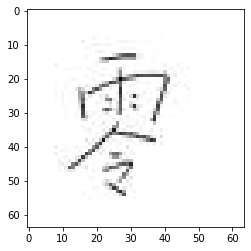

In [17]:

print("reality: ", y_test[0])
plt.imshow(X_test[0], cmap=plt.cm.binary)


reality:  12


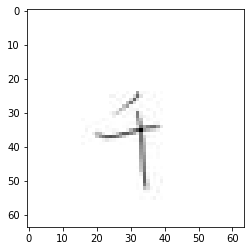

In [19]:
print("reality: ", y_test[1])
plt.imshow(X_test[1], cmap=plt.cm.binary)

# Models

Try 3 diiferent models and look which performs best

First just a neural network without any convolution.

In [20]:
model1 = tf.keras.models.Sequential()


    
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(2046, activation="relu"))
model1.add(tf.keras.layers.Dense(128, activation="relu"))
model1.add(tf.keras.layers.Dense(128, activation="relu"))
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.Dense(15, activation="softmax"))

model1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model1.fit(X_train, y_train, epochs=10)



Epoch 1/10
375/375 [==============================] - 12s 30ms/step - loss: 1.6232 - accuracy: 0.4615
Epoch 2/10
375/375 [==============================] - 11s 29ms/step - loss: 0.6624 - accuracy: 0.7757
Epoch 3/10
375/375 [==============================] - 11s 29ms/step - loss: 0.3482 - accuracy: 0.8809
Epoch 4/10
375/375 [==============================] - 11s 29ms/step - loss: 0.2024 - accuracy: 0.9312
Epoch 5/10
375/375 [==============================] - 11s 30ms/step - loss: 0.1498 - accuracy: 0.9525
Epoch 6/10
375/375 [==============================] - 11s 30ms/step - loss: 0.1034 - accuracy: 0.9668
Epoch 7/10
375/375 [==============================] - 11s 29ms/step - loss: 0.0882 - accuracy: 0.9728
Epoch 8/10
375/375 [==============================] - 11s 29ms/step - loss: 0.0675 - accuracy: 0.9787
Epoch 9/10
375/375 [==============================] - 12s 31ms/step - loss: 0.0724 - accuracy: 0.9774
Epoch 10/10
375/375 [==============================] - 14s 36ms/step - loss: 0.061

In [21]:
model1.evaluate(X_test, y_test)

94/94 [==============================] - 1s 7ms/step - loss: 0.5917 - accuracy: 0.8667


[0.5916736125946045, 0.8666666746139526]

One can see that the model is overfitting since the training accuracy is much higher than the test accuracy. Still the the training accuracy is still bad with about 85%.

Next try a convolutional neural network with pooling and dropout.

In [22]:
model2 = tf.keras.models.Sequential()

model2.add(tf.keras.layers.Conv2D(
            32, (3, 3), activation="relu", input_shape=(64, 64, 1))) 

model2.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3)))
    
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(264, activation="relu"))
model2.add(tf.keras.layers.Dropout(0.25))
model2.add(tf.keras.layers.Dense(264, activation="relu"))
model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.Dense(15, activation="softmax"))

model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model2.fit(X_train, y_train, epochs=10)

Epoch 1/10
375/375 [==============================] - 13s 34ms/step - loss: 1.3920 - accuracy: 0.5435
Epoch 2/10
375/375 [==============================] - 12s 33ms/step - loss: 0.5366 - accuracy: 0.8201
Epoch 3/10
375/375 [==============================] - 12s 31ms/step - loss: 0.3308 - accuracy: 0.8914
Epoch 4/10
375/375 [==============================] - 11s 30ms/step - loss: 0.2384 - accuracy: 0.9210
Epoch 5/10
375/375 [==============================] - 11s 30ms/step - loss: 0.1753 - accuracy: 0.9415
Epoch 6/10
375/375 [==============================] - 11s 29ms/step - loss: 0.1436 - accuracy: 0.9510
Epoch 7/10
375/375 [==============================] - 11s 29ms/step - loss: 0.1191 - accuracy: 0.9601
Epoch 8/10
375/375 [==============================] - 11s 29ms/step - loss: 0.0977 - accuracy: 0.9672
Epoch 9/10
375/375 [==============================] - 13s 35ms/step - loss: 0.0841 - accuracy: 0.9720
Epoch 10/10
375/375 [==============================] - 15s 39ms/step - loss: 0.080

In [23]:
model2.evaluate(X_test, y_test)

94/94 [==============================] - 1s 11ms/step - loss: 0.1535 - accuracy: 0.9570


[0.15346592664718628, 0.9570000171661377]

This model has a similar accuracy both one the training set and the test set, and the test accuracy is fairly high with about 95%. So in conclusion a good model has been found.

Now try a slight modification of the prevoius model, by adding one more hidden layer and see if there in any improvement, but keeping the trainable parameters similar to the last model.

In [24]:
model3 = tf.keras.models.Sequential()

model3.add(tf.keras.layers.Conv2D(
            32, (3, 3), activation="relu", input_shape=(64, 64, 1))) 

model3.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3)))
    
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(264, activation="relu"))
model3.add(tf.keras.layers.Dropout(0.25))
model3.add(tf.keras.layers.Dense(128, activation="relu"))
model3.add(tf.keras.layers.Dropout(0.25))
model3.add(tf.keras.layers.Dense(128, activation="relu"))
model3.add(tf.keras.layers.Dropout(0.5))
model3.add(tf.keras.layers.Dense(15, activation="softmax"))

model3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model3.fit(X_train, y_train, epochs=10)

Epoch 1/10
375/375 [==============================] - 13s 34ms/step - loss: 1.7488 - accuracy: 0.4292
Epoch 2/10
375/375 [==============================] - 12s 32ms/step - loss: 0.7511 - accuracy: 0.7419
Epoch 3/10
375/375 [==============================] - 12s 32ms/step - loss: 0.4560 - accuracy: 0.8484
Epoch 4/10
375/375 [==============================] - 11s 31ms/step - loss: 0.3241 - accuracy: 0.8905
Epoch 5/10
375/375 [==============================] - 11s 30ms/step - loss: 0.2421 - accuracy: 0.9218
Epoch 6/10
375/375 [==============================] - 11s 30ms/step - loss: 0.1986 - accuracy: 0.9362
Epoch 7/10
375/375 [==============================] - 11s 29ms/step - loss: 0.1640 - accuracy: 0.9482
Epoch 8/10
375/375 [==============================] - 14s 38ms/step - loss: 0.1391 - accuracy: 0.9575
Epoch 9/10
375/375 [==============================] - 14s 36ms/step - loss: 0.1172 - accuracy: 0.9611
Epoch 10/10
375/375 [==============================] - 13s 34ms/step - loss: 0.105

In [25]:
model3.evaluate(X_test, y_test)

94/94 [==============================] - 1s 11ms/step - loss: 0.1440 - accuracy: 0.9597


[0.14402571320533752, 0.9596666693687439]

The model has similar scores as the last one. 

Have run these models several times with different test and training sets and the scores are always similar. In conclusion both the second and third model here perform well, and can be chosen as good models. 

Now choose the second model and take a closer look how the model performed on the different characters.

Get the predictions.

In [26]:
predictions = model2.predict(X_test)

predictions2 = list()
for n in range(len(predictions)):
    predictions2.append(np.argmax(predictions[n]))
    
predictions2 = np.array(predictions2)



94/94 [==============================] - 1s 10ms/step


Look at the confusion matrix and the classification report.

In [27]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    
    # Load font to display chinese characters
    fprop = fm.FontProperties(fname='NotoSansTC-Regular.otf')
    
    cm = confusion_matrix(y, y_predict)
    _, ax = plt.subplots(figsize=(16,16))
    sns.heatmap(cm, annot=True, ax = ax); 
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['零', '一','二','三','四','五','六','七','八','九','十','百','千','万','亿'],fontproperties=fprop); 
    ax.yaxis.set_ticklabels(['零', '一','二','三','四','五','六','七','八','九','十','百','千','万','亿'],fontproperties=fprop); 


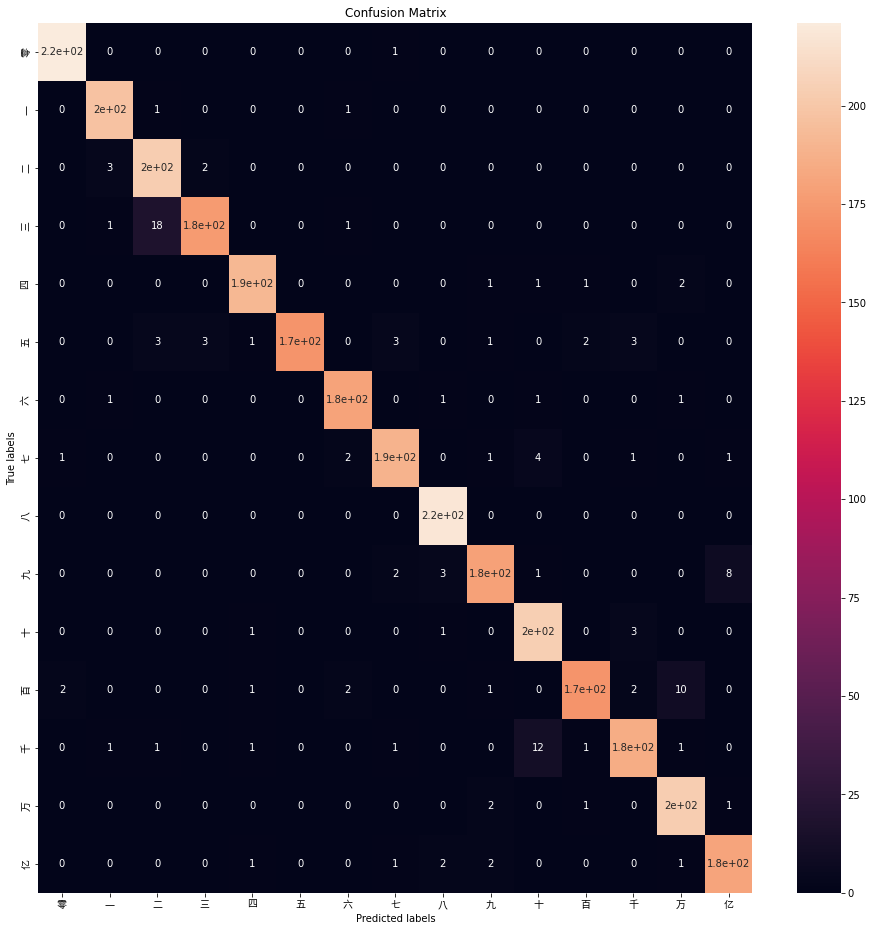

In [28]:
plot_confusion_matrix(y_test,predictions2)

In [29]:
print(classification_report(y_test,predictions2))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       222
           1       0.97      0.99      0.98       199
           2       0.90      0.98      0.94       208
           3       0.97      0.90      0.93       196
           4       0.97      0.97      0.97       196
           5       1.00      0.91      0.96       188
           6       0.97      0.98      0.97       184
           7       0.96      0.95      0.95       199
           8       0.97      1.00      0.98       218
           9       0.96      0.93      0.94       193
          10       0.91      0.98      0.94       209
          11       0.97      0.91      0.94       190
          12       0.95      0.91      0.93       203
          13       0.93      0.98      0.96       207
          14       0.95      0.96      0.96       188

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96   

Looking at the confusion matrix and classification report one can see that all scores are above 90%, but there one can see that  三 has been often misclassified as  二 , and also often 千 has been falsely classified as 十 and 百 has been falsely classified as 万. <br>
Running this for different test and traning sets one can observe different patterns, but for example misclassifications involving the pairs 二,三 and 百,万 are often observable.

## Conclusion

Good models has been found via simple Convolutional Neural Networks. Using more sophisticated techniques the accuracy may be further improved. It would be interesting to see how good Neural Networks would perform on a larger set of Chinese characters, containing more complex ones.